In [3]:
print('Hello Final Exam')

Hello Final Exam


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [9]:
swedish_morotor_insurance = pd.read_csv('swedish_motor_insurance.csv')
swedish_morotor_insurance.head()

,n_claims,total_payment_sek
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [10]:
print(swedish_morotor_insurance.mean(numeric_only=True))

n_claims             22.904762
total_payment_sek    98.187302
dtype: float64


In [12]:
print(swedish_morotor_insurance['n_claims'].corr(swedish_morotor_insurance['total_payment_sek']))

0.9128782350234067


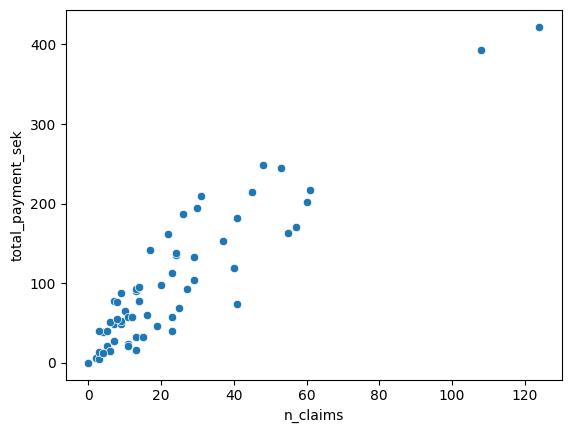

In [13]:
sns.scatterplot(data=swedish_morotor_insurance,x='n_claims',y='total_payment_sek')
plt.show()

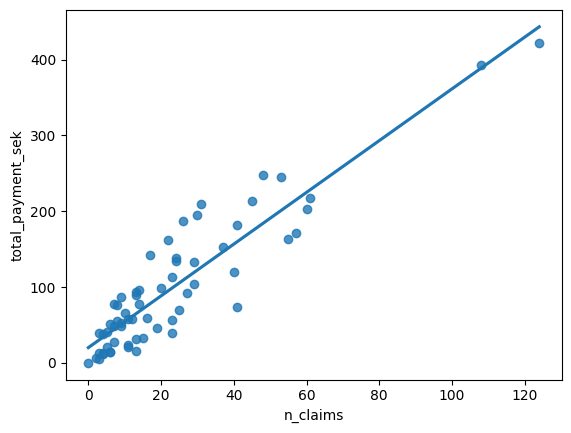

In [16]:
# This is adding linear trend line
sns.regplot(data=swedish_morotor_insurance,x='n_claims',y='total_payment_sek',ci=None)
plt.show()

In [17]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


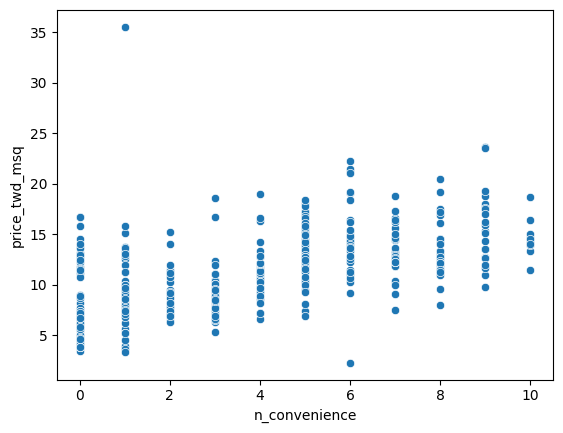

In [ ]:
sns.scatterplot(data=taiwan_real_estate,x='n_convenience',y='price_twd_msq')
plt.show()

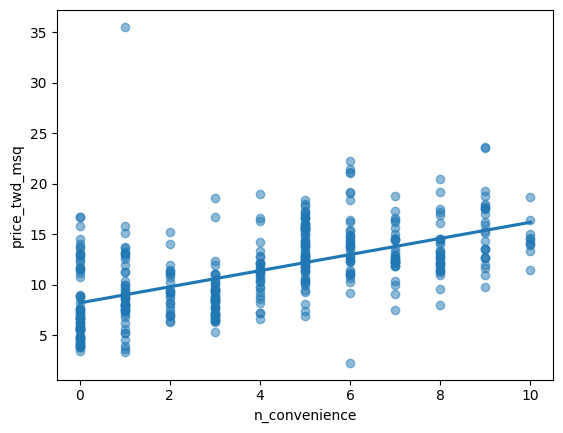

In [24]:
# scatter-kws = {'alpha':0.5} means transparency 50%
sns.regplot(data=taiwan_real_estate,x='n_convenience',y='price_twd_msq',ci=None,scatter_kws={'alpha':0.5})
plt.show()

In [ ]:
# Intercept = y value at x=0
# Slope = The amount of y value increases when x is increased by one
# Slope = y2-y1/x2-x1
# y = intercept + x * slope

In [27]:
from statsmodels.formula.api import ols

mdl_payment_vs_claims = ols('total_payment_sek ~ n_claims', data=swedish_morotor_insurance)
mdl_payment_vs_claims = mdl_payment_vs_claims.fit()
print(mdl_payment_vs_claims.params)

Intercept    19.994486
n_claims      3.413824
dtype: float64


In [28]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [29]:
from statsmodels.formula.api import ols

mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience' , data=taiwan_real_estate)
mdl_price_vs_conv = mdl_price_vs_conv.fit()
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [ ]:
# Intercept        8.224237 <- Y (Intercept)
# n_convenience    0.798080 <- X (Slope)
# dtype: float64

In [32]:
fish = pd.read_csv('fish.csv')
fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


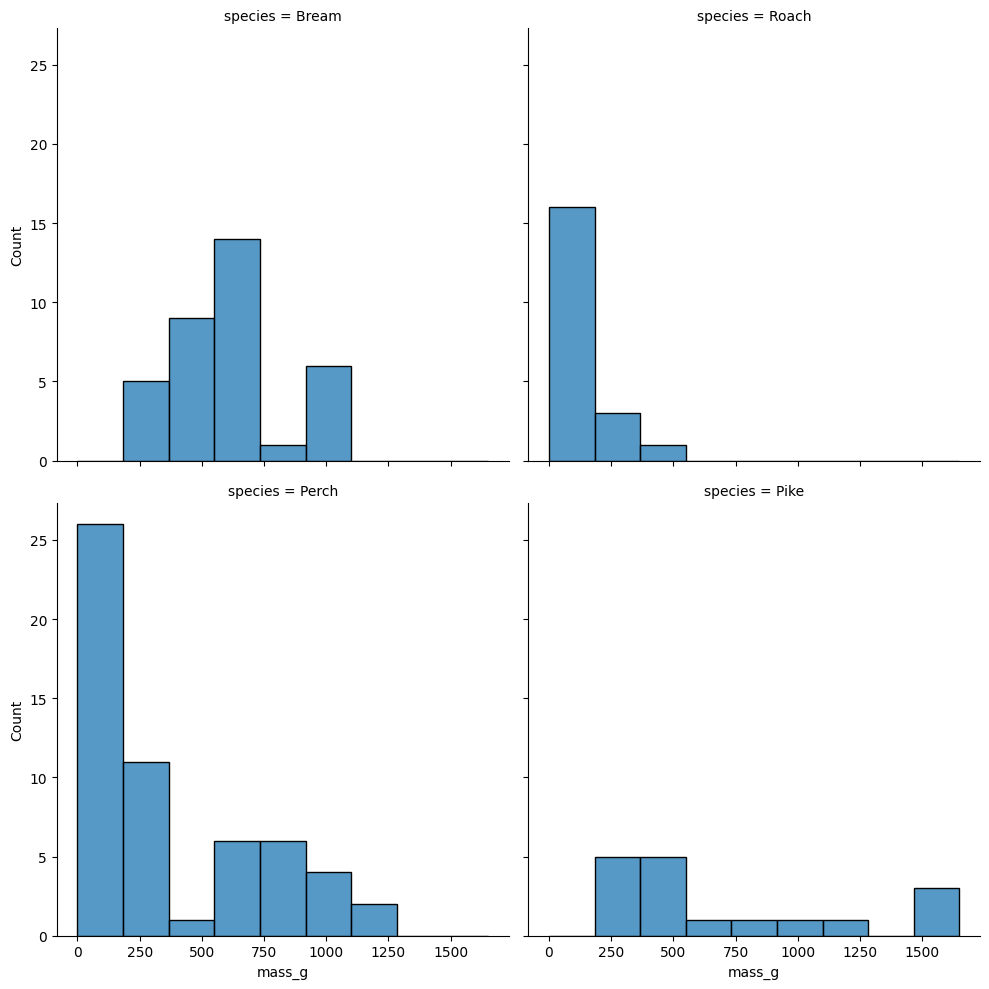

In [33]:
sns.displot(data=fish,x='mass_g',col='species',col_wrap=2,bins=9)
plt.show()

In [34]:
summary_stats = fish.groupby('species')['mass_g'].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [35]:
mdl_mass_vs_species = ols('mass_g ~ species',data=fish)
mdl_mass_vs_species = mdl_mass_vs_species.fit()
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [36]:
# Withoud an intercept
mdl_mass_vs_species_noInter = ols('mass_g ~ species + 0',data=fish).fit()
print(mdl_mass_vs_species_noInter.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


In [37]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


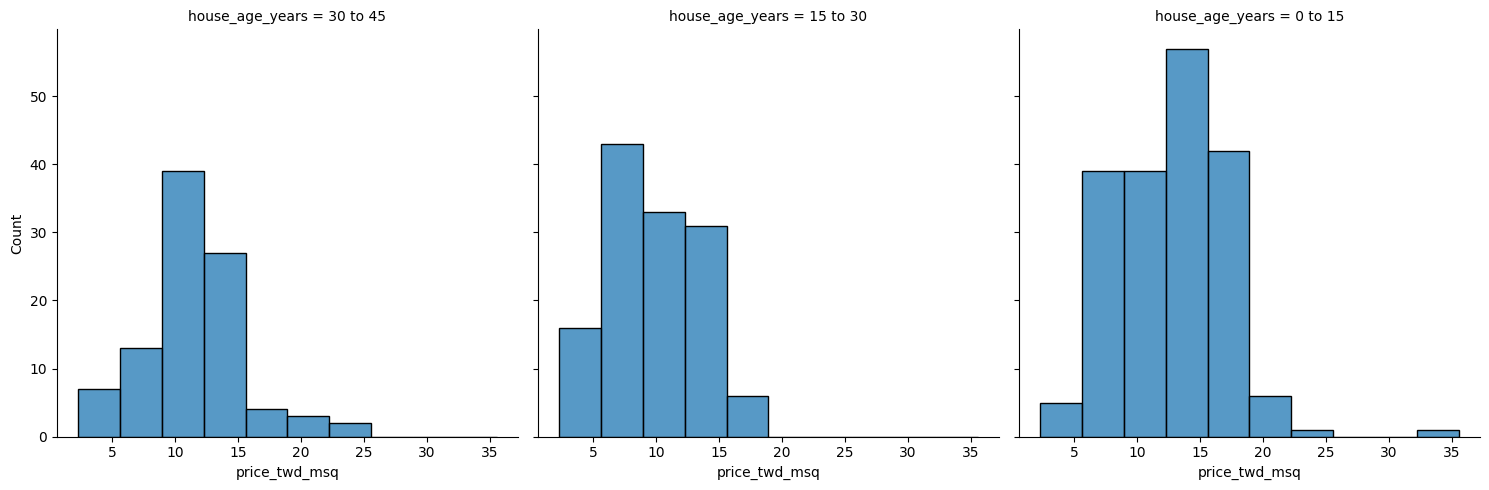

In [38]:
sns.displot(data=taiwan_real_estate,x='price_twd_msq',col='house_age_years',bins=10)
plt.show()

In [39]:
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [40]:
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years',data=taiwan_real_estate).fit()
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [41]:
mdl_price_vs_age0 = ols('price_twd_msq ~ house_age_years + 0',data=taiwan_real_estate).fit()
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [42]:
bream = fish[fish['species'] == 'Bream']
bream.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


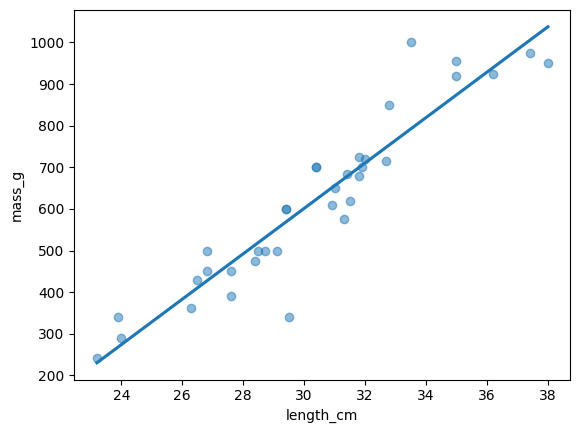

In [43]:
sns.regplot(data=bream,x='length_cm',y='mass_g',ci=None,scatter_kws={'alpha':0.5})
plt.show()

In [44]:
breamMdl_mass_vs_length = ols('mass_g ~ length_cm',data=bream).fit()
print(breamMdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [45]:
explanatory_data_bream = pd.DataFrame({'length_cm':np.arange(20,41)})
print(explanatory_data_bream)

    length_cm
0          20
1          21
2          22
3          23
4          24
5          25
6          26
7          27
8          28
9          29
10         30
11         31
12         32
13         33
14         34
15         35
16         36
17         37
18         38
19         39
20         40


In [46]:
prediction_data_bream = breamMdl_mass_vs_length.predict(explanatory_data_bream)
print(prediction_data_bream)

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [48]:
prediction_assign = explanatory_data_bream.assign(mass_g = breamMdl_mass_vs_length.predict(explanatory_data_bream))
print(prediction_assign)

    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


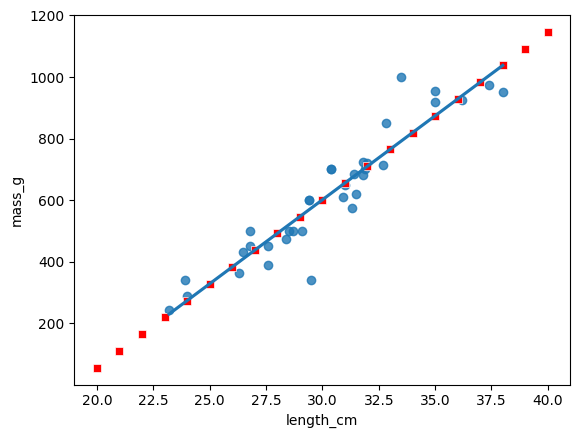

In [49]:
plt.Figure()

#Original plot using regplot with trend line
sns.regplot(data=bream,x='length_cm',y='mass_g',ci=None)

#Prediction plot using prediction data which is assigned to explanatory data 
sns.scatterplot(data=prediction_assign,x='length_cm',y='mass_g',color='red',marker='s')

plt.show()

In [50]:
little_bream = pd.DataFrame({'length_cm':[10]})

pred_little_bream = little_bream.assign(
    mass_g = breamMdl_mass_vs_length.predict(little_bream)
)

print(pred_little_bream)

   length_cm      mass_g
0         10 -489.847756


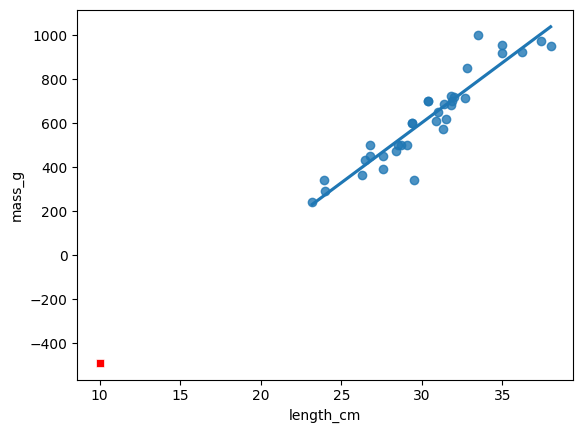

In [51]:
plt.Figure
sns.regplot(data=bream,x='length_cm',y='mass_g',ci=None)
sns.scatterplot(data=pred_little_bream,x='length_cm',y='mass_g',color='red',marker='s')
plt.show()

In [54]:
explanatory_data_nConvenience = pd.DataFrame({'n_convenience':np.arange(0,11)})
print(explanatory_data_nConvenience)

prediction_data_price = explanatory_data_nConvenience.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data_nConvenience)
)

print(prediction_data_price)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10
    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


In [55]:
breamMdl_mass_vs_length.fittedvalues

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64

In [57]:
bream_length = bream['length_cm']
breamMdl_mass_vs_length.predict(bream_length)

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64

In [ ]:
# Inaccuracy of the model fit
print(breamMdl_mass_vs_length.resid)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [ ]:
# Each residual is the actual response values minus the prediction response values
print(bream['mass_g'] - breamMdl_mass_vs_length.fittedvalues)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64
0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834

In [61]:
#2
print(bream['mass_g'] - breamMdl_mass_vs_length.predict(bream_length))

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [62]:
coeffs = mdl_price_vs_conv.params
print(coeffs)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [63]:
intercept = coeffs[0]
slope = coeffs[1]

# Response = intercept + slope * Explanatory

price_twd_msq = intercept + (slope * taiwan_real_estate['n_convenience'])
print(price_twd_msq)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Name: n_convenience, Length: 414, dtype: float64


/var/folders/m3/z1dcknvs5nqcqxz3wl0jyjnm0000gn/T/ipykernel_68220/2004881631.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]
/var/folders/m3/z1dcknvs5nqcqxz3wl0jyjnm0000gn/T/ipykernel_68220/2004881631.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1]


In [65]:
explanatory_data_allnConvenience = taiwan_real_estate['n_convenience']

prediction = mdl_price_vs_conv.predict(explanatory_data_allnConvenience)
print(prediction)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [71]:
perch = fish[fish['species'] == 'Perch']
perch.head()

,species,mass_g,length_cm
55,Perch,5.9,7.5
56,Perch,32.0,12.5
57,Perch,40.0,13.8
58,Perch,51.5,15.0
59,Perch,70.0,15.7


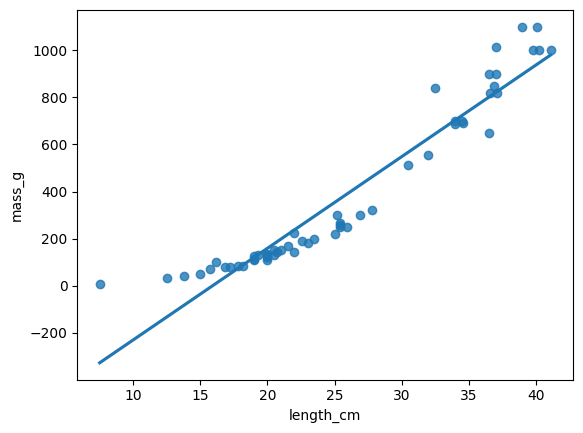

In [72]:
sns.regplot(data=perch,x='length_cm',y='mass_g',ci=None)
plt.show()

In [73]:
perch['length_cm_cubbed'] = perch['length_cm'] ** 3
perch.head()

/var/folders/m3/z1dcknvs5nqcqxz3wl0jyjnm0000gn/T/ipykernel_68220/668982680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perch['length_cm_cubbed'] = perch['length_cm'] ** 3


,species,mass_g,length_cm,length_cm_cubbed
55,Perch,5.9,7.5,421.875
56,Perch,32.0,12.5,1953.125
57,Perch,40.0,13.8,2628.072
58,Perch,51.5,15.0,3375.000
59,Perch,70.0,15.7,3869.893


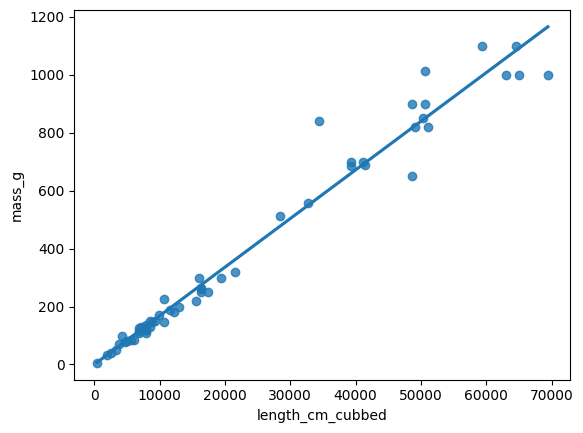

In [74]:
sns.regplot(data=perch,x='length_cm_cubbed',y='mass_g',ci=None)
plt.show()

In [75]:
mdl_perch = ols('mass_g ~ length_cm_cubbed',data=perch).fit()
print(mdl_perch.params)

Intercept          -0.117478
length_cm_cubbed    0.016796
dtype: float64


In [81]:
perch_explanatory_data = pd.DataFrame(
    {'length_cm':np.arange(10,41,5),
    'length_cm_cubbed':np.arange(10,41,5) ** 3}
)
print(perch_explanatory_data)
print()
perch_prediction = mdl_perch.predict(perch_explanatory_data)
print(perch_prediction)

result_data = perch_explanatory_data.assign(
    mass_g = perch_prediction
)

print()
print(result_data.head())


   length_cm  length_cm_cubbed
0         10              1000
1         15              3375
2         20              8000
3         25             15625
4         30             27000
5         35             42875
6         40             64000

0      16.678135
1      56.567717
2     134.247429
3     262.313982
4     453.364084
5     719.994447
6    1074.801781
dtype: float64

   length_cm  length_cm_cubbed      mass_g
0         10              1000   16.678135
1         15              3375   56.567717
2         20              8000  134.247429
3         25             15625  262.313982
4         30             27000  453.364084


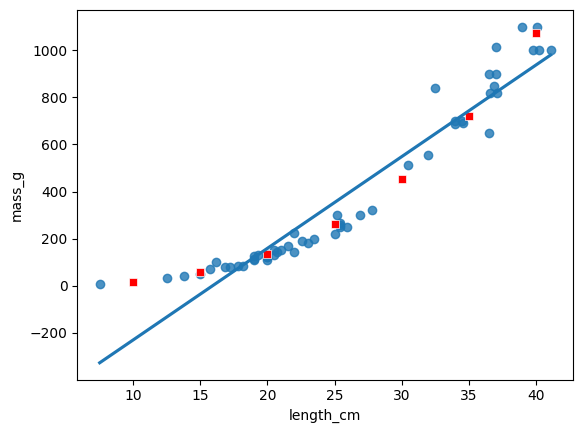

In [82]:
plt.Figure
sns.regplot(data=perch,x='length_cm',y='mass_g',ci=None)
sns.scatterplot(data=result_data,x='length_cm',y='mass_g',color='red',marker='s')
plt.show()

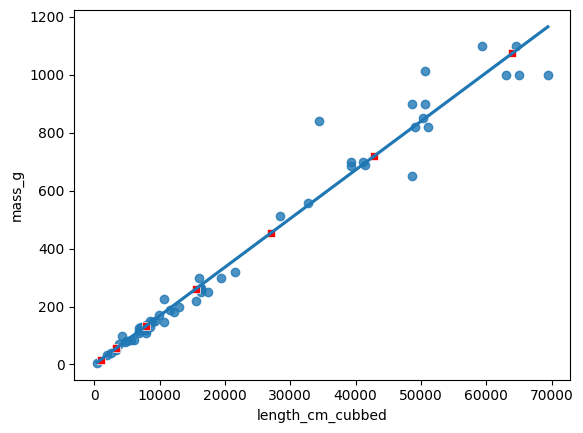

In [83]:
plt.Figure
sns.regplot(data=perch,x='length_cm_cubbed',y='mass_g',ci=None)
sns.scatterplot(data=result_data,x='length_cm_cubbed',y='mass_g',color='red',marker='s')
plt.show()

In [84]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


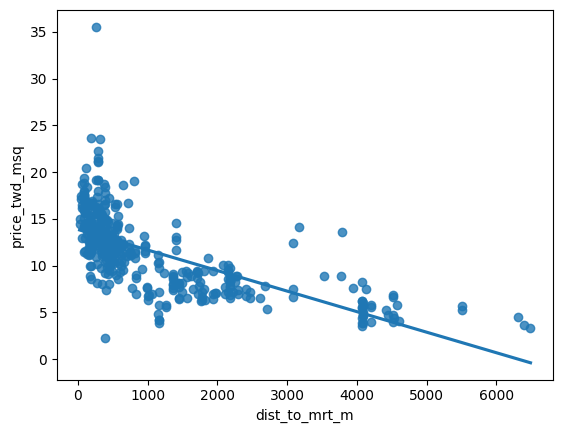

In [86]:
sns.regplot(data=taiwan_real_estate,x='dist_to_mrt_m',y='price_twd_msq',ci=None)
plt.show()

In [87]:
taiwan_real_estate['sqrt_dist_to_mrt'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])
taiwan_real_estate.head()


,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt
0,84.87882,10,30 to 45,11.467474,9.212970
1,306.59470,9,15 to 30,12.768533,17.509846
2,561.98450,5,0 to 15,14.311649,23.706212
3,561.98450,5,0 to 15,16.580938,23.706212
4,390.56840,5,0 to 15,13.040847,19.762803


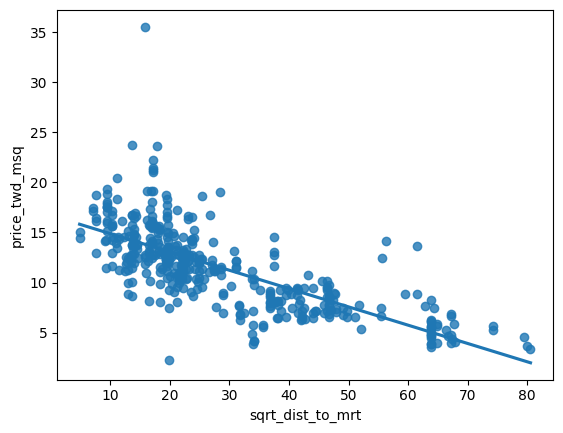

In [88]:
sns.regplot(data=taiwan_real_estate,x='sqrt_dist_to_mrt',y='price_twd_msq',ci=None)
plt.show()

In [89]:
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt',data=taiwan_real_estate).fit()
print(mdl_price_vs_dist.params)

Intercept           16.709799
sqrt_dist_to_mrt    -0.182843
dtype: float64


In [91]:
explanatory_data = pd.DataFrame({
    'dist_to_mrt':np.arange(0,81,10) ** 2,
    'sqrt_dist_to_mrt':np.sqrt(np.arange(0,81,10) ** 2)
})

prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

print(prediction_data)

   dist_to_mrt  sqrt_dist_to_mrt  price_twd_msq
0            0               0.0      16.709799
1          100              10.0      14.881370
2          400              20.0      13.052942
3          900              30.0      11.224513
4         1600              40.0       9.396085
5         2500              50.0       7.567656
6         3600              60.0       5.739227
7         4900              70.0       3.910799
8         6400              80.0       2.082370


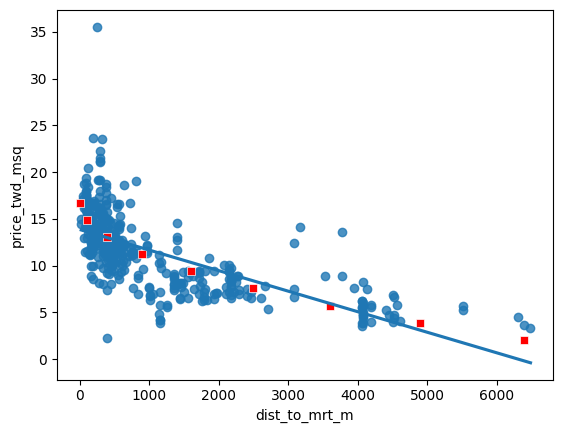

In [93]:
plt.Figure
sns.regplot(data=taiwan_real_estate,x='dist_to_mrt_m',y='price_twd_msq',ci=None)
sns.scatterplot(data=prediction_data,x='dist_to_mrt',y='price_twd_msq',color='red',marker='s')
plt.show()

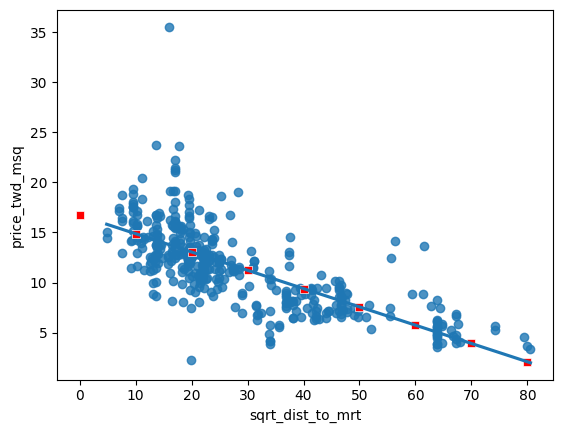

In [94]:
plt.Figure
sns.regplot(data=taiwan_real_estate,x='sqrt_dist_to_mrt',y='price_twd_msq',ci=None)
sns.scatterplot(data=prediction_data,x='sqrt_dist_to_mrt',y='price_twd_msq',color='red',marker='s')
plt.show()

In [95]:
bream.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


In [98]:
mdl_bream = ols('mass_g ~ length_cm',data=bream).fit()
mdl_bream.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           1.22e-16
Time:                        15:40:54   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.000   -1255.020    -815.676
length_cm     54.5500      3.539     15.415      0.000      47.350      61.750
==============================================================================
Omnibus:                        7.314   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.857
Skew:                          -0.252   Prob(JB):                      0.00439
Kurtosis:                       5.682   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
print(mdl_bream.rsquared)

0.8780627095147174


In [101]:
# MSE = RSE ^ 2
mse = mdl_bream.mse_resid
print('mse: ' + str(mse))

mse: 5498.555084973521


In [102]:
rse = np.sqrt(mse)
print('rse:' + str(rse))

rse:74.15224261594197
